## Ejercicio Bolsa Solucionado

El objetivo es agrupar un conjunto de valores de bolsa de acuerdo a su comportamiento.

In [1]:
import pickle

StockValues = pickle.load( open( "StockValues.p", "rb" ) )


In [2]:
print(StockValues)
#lis=lista_ibex()


                  MSFT       AAPL          T        GOOGL        HPQ  \
Date                                                                   
2018-01-02   85.949997  43.064999  38.540001  1073.209961  21.320000   
2018-01-03   86.349998  43.057499  37.650002  1091.520020  21.370001   
2018-01-04   87.110001  43.257500  38.000000  1095.760010  21.530001   
2018-01-05   88.190002  43.750000  38.139999  1110.290039  21.750000   
2018-01-08   88.279999  43.587502  38.250000  1114.209961  21.840000   
...                ...        ...        ...          ...        ...   
2019-12-23  157.410004  71.000000  39.070000  1350.630005  20.559999   
2019-12-24  157.380005  71.067497  38.959999  1344.430054  20.590000   
2019-12-26  158.669998  72.477501  39.160000  1362.469971  20.690001   
2019-12-27  158.960007  72.449997  39.240002  1354.640015  20.530001   
2019-12-30  157.589996  72.879997  39.040001  1339.709961  20.490000   

                   VZ         CVX       ORAN        VOD        

In [6]:
lista_val=list(StockValues.columns.values)#creamos un cluster y lo manipulamos con kmean de skilearn, transformamos los valores a una lista 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)#creamos 3 cluster y los recorremos por medio de un algoritmo iterado 100 veces
import numpy as np
X = np.array(StockValues.T) ### we need to transpose
#for i in range (len(X)): ### Normalizar, no es necesario
#    X[i]=X[i][0]#los valores se deben transponer 
km.fit(X)#utilizamos la funcion fit para entrenarlo
print(lista_val)#esta lista corresponde a la lista de empresas que tenemos 
print(km.labels_)
#microfost, apple, google tienen coportontamientos distintos

['MSFT', 'AAPL', 'T', 'GOOGL', 'HPQ', 'VZ', 'CVX', 'ORAN', 'VOD', 'JPM', 'BBVA', 'RBS', 'BK']
[2 0 0 1 0 0 2 0 0 2 0 0 0]


In [7]:
lista_val
X

array([[ 85.94999695,  86.34999847,  87.11000061, ..., 158.66999817,
        158.96000671, 157.58999634],
       [ 43.06499863,  43.05749893,  43.25749969, ...,  72.47750092,
         72.44999695,  72.87999725],
       [ 38.54000092,  37.65000153,  38.        , ...,  39.15999985,
         39.24000168,  39.04000092],
       ...,
       [  8.53999996,   8.53999996,   8.68000031, ...,   5.59000015,
          5.59000015,   5.55999994],
       [  7.67000008,   7.59000015,   7.69000006, ...,   6.38000011,
          6.3499999 ,   6.36000013],
       [ 53.81999969,  54.15000153,  54.68999863, ...,  50.49000168,
         50.31999969,  50.18000031]])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


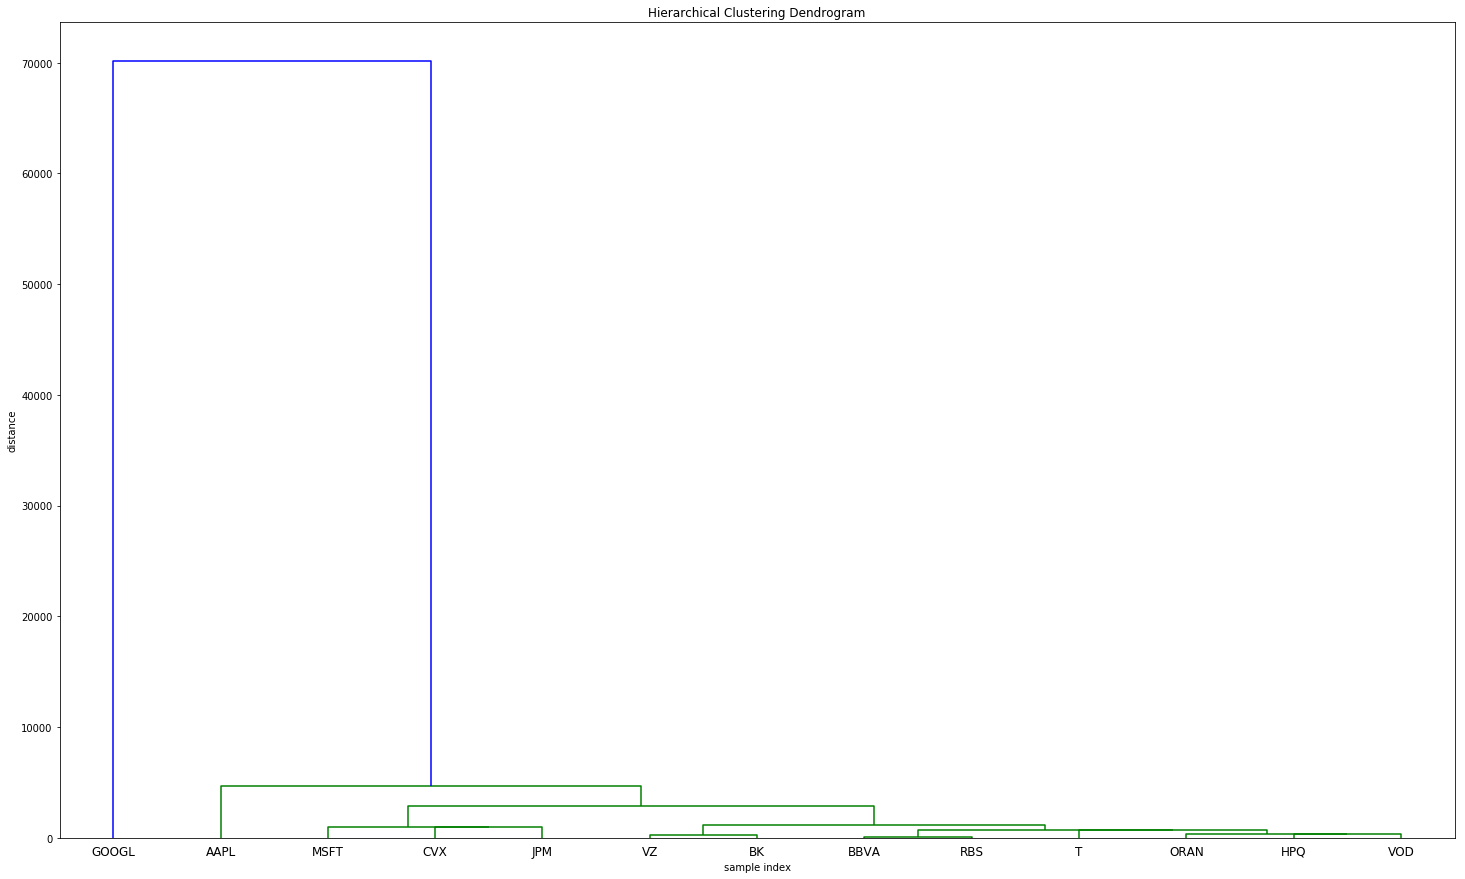

In [13]:
%matplotlib inline 
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt#vamos a graficar un dendograma, este nos da informacion de cuan similar es una empresa 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
ytdist = euclidean_distances(X)
#ytdist = 1-cosine_similarity(X)


#el dendograma esta mal debido a las distancias euclidianas 
#estas distancias no tienen en cuenta el valor de inversion 
Z = hierarchy.linkage(ytdist, 'single')

plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(  Z ,labels=lista_val )
plt.show()#se puede observar erroneamente que microsoft es similar a jp morgan

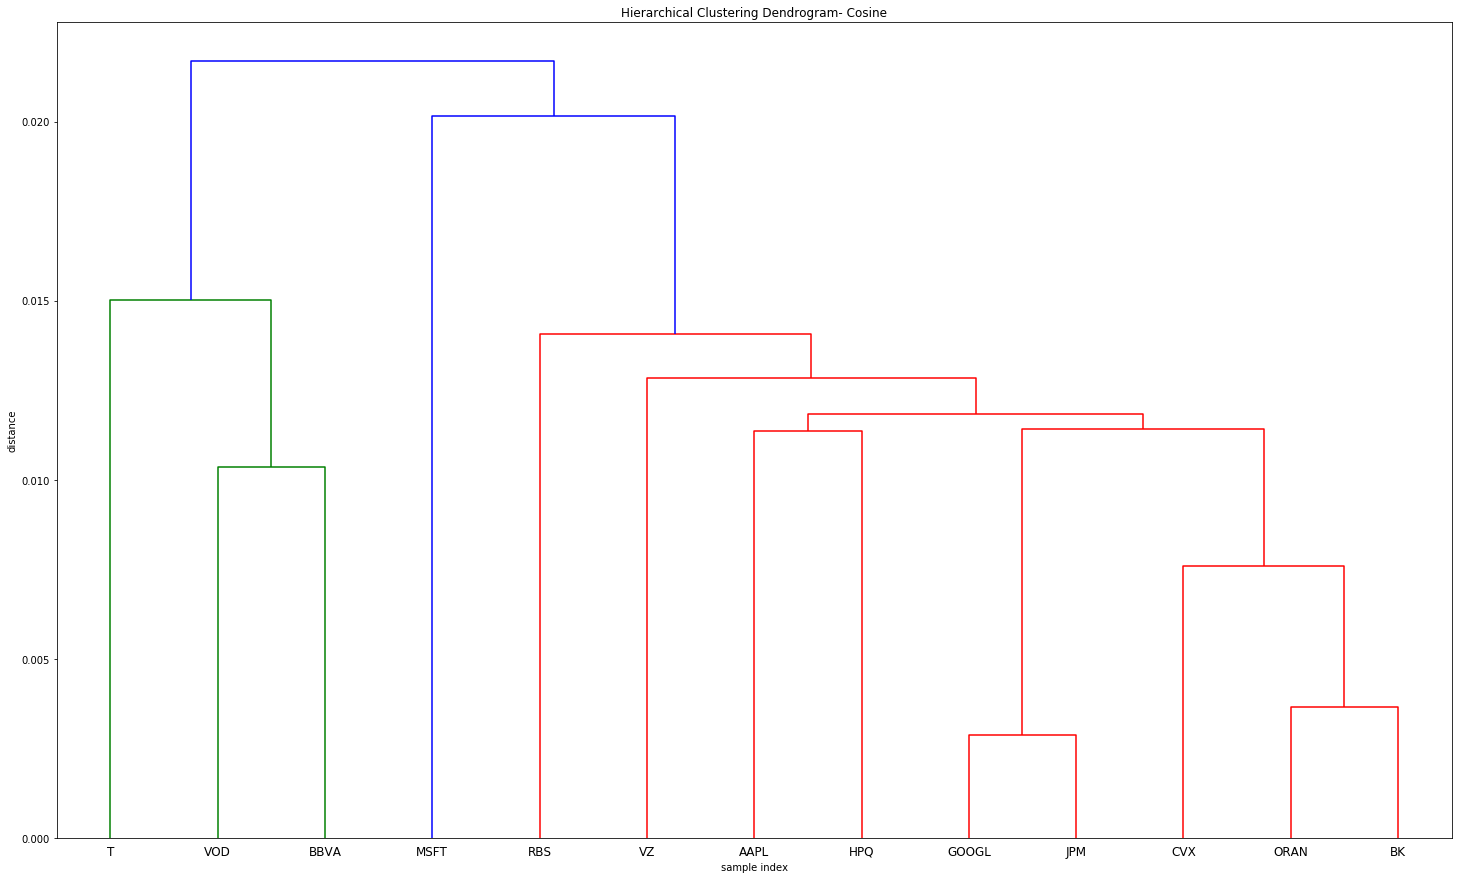

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

ytdistcos = 1 - cosine_similarity(X)

Z = hierarchy.linkage(ytdistcos, 'single')#el problema del dendograma anterior lo arreglamos basando la distancia en cosenos es decir los angulos del vector 
#los valores vienen de matrices de similitud 

plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram- Cosine')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z ,labels=lista_val )
plt.show()#el cluster nos esta agrupando comportamientos muy similares
#metricas basicas de inversion